In [190]:
import pandas as pd
import numpy as np

In [191]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [192]:
df = pd.read_csv("C:/Users/H/Documents/agroclimatic_clusters.txt", sep=',', header=None, names=names, index_col=False, engine='python')

In [193]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [194]:
df['state'].value_counts()

uttar pradesh             52080
madhya pradesh            35712
bihar                     27528
maharashtra               25296
rajasthan                 23808
orissa                    22320
tamil nadu                22320
karnataka                 20088
gujarat                   18600
andhra pradesh            17112
assam                     17112
jharkhand                 16368
west bengal               14136
haryana                   14136
punjab                    12648
chhattisgarh              11904
arunachal pradesh         11160
jammu and kashmir         10416
kerala                    10416
uttaranchal                9672
himachal pradesh           8928
manipur                    6696
mizoram                    5952
nagaland                   5952
meghalaya                  5208
puducherry                 2976
sikkim                     2976
tripura                    2976
andaman and nicobar        1488
goa                        1488
daman and diu              1488
chandiga

In [195]:
a = []
for i in range(len(df)):
    if df['state'][i]!='tamil nadu':
        a.append(i)

In [196]:
df = df.drop(a)

In [197]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
17112,1958,1,50,30.4,22.5,55,0.8,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22
17113,1958,2,78,31.6,23.5,79,1.4,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22
17114,1958,3,130,34.4,25.2,126,2.2,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22
17115,1958,4,101,34.4,26.4,98,2.7,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22
17116,1958,5,103,34.7,27.5,99,3.5,tamil nadu,tirunelveli kattabo,4,8,10,13,22,4,19,22


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22320 entries, 17112 to 425567
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            22320 non-null  int64  
 1   Month           22320 non-null  int64  
 2   ppt(mm)         22320 non-null  int64  
 3   tmax(degC)      22320 non-null  float64
 4   tmin(degC)      22320 non-null  float64
 5   aet(mm)         22320 non-null  int64  
 6   PDSI(unitless)  22320 non-null  float64
 7   state           22320 non-null  object 
 8   district        22320 non-null  object 
 9   cluster14       22320 non-null  int64  
 10  cluster15       22320 non-null  int64  
 11  cluster18       22320 non-null  int64  
 12  cluster20       22320 non-null  int64  
 13  cluster25       22320 non-null  int64  
 14  cluster27       22320 non-null  int64  
 15  cluster30       22320 non-null  int64  
 16  cluster35       22320 non-null  int64  
dtypes: float64(3), int64(12), 

In [199]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(22320, 8)

In [200]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [201]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
17112,1958,1,50,30.4,22.5,55,0.8,tirunelveli kattabo,1-1958
17113,1958,2,78,31.6,23.5,79,1.4,tirunelveli kattabo,2-1958
17114,1958,3,130,34.4,25.2,126,2.2,tirunelveli kattabo,3-1958
17115,1958,4,101,34.4,26.4,98,2.7,tirunelveli kattabo,4-1958
17116,1958,5,103,34.7,27.5,99,3.5,tirunelveli kattabo,5-1958


In [202]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [203]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
17112,1958,1,50,30.4,22.5,55,0.8,tirunelveli kattabo,1958-01-01,1
17113,1958,2,78,31.6,23.5,79,1.4,tirunelveli kattabo,1958-02-01,1
17114,1958,3,130,34.4,25.2,126,2.2,tirunelveli kattabo,1958-03-01,1
17115,1958,4,101,34.4,26.4,98,2.7,tirunelveli kattabo,1958-04-01,1
17116,1958,5,103,34.7,27.5,99,3.5,tirunelveli kattabo,1958-05-01,1


In [204]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
17112,1958,1,50,55,0.8,tirunelveli kattabo,1958-01-01,1,26.45
17113,1958,2,78,79,1.4,tirunelveli kattabo,1958-02-01,1,27.55
17114,1958,3,130,126,2.2,tirunelveli kattabo,1958-03-01,1,29.80
17115,1958,4,101,98,2.7,tirunelveli kattabo,1958-04-01,1,30.40
17116,1958,5,103,99,3.5,tirunelveli kattabo,1958-05-01,1,31.10


In [205]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
425563,2019,8,133,128,-0.7,namakkal,2019-08-01,1,29.35
425564,2019,9,122,118,1.6,namakkal,2019-09-01,1,29.40
425565,2019,10,194,122,1.7,namakkal,2019-10-01,1,28.65
425566,2019,11,107,108,1.8,namakkal,2019-11-01,1,28.20
425567,2019,12,21,39,1.2,namakkal,2019-12-01,1,26.80


In [206]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,58,26.20,99,tirunelveli kattabo
1,1981-02-01,28,27.35,61,tirunelveli kattabo
2,1981-03-01,52,30.10,60,tirunelveli kattabo
3,1981-04-01,68,31.05,71,tirunelveli kattabo
4,1981-05-01,55,32.00,56,tirunelveli kattabo


In [207]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
17844,2019,1,3,24,-1.8,tirunelveli kattabo,2019-01-01,1,27.20
17845,2019,2,63,68,-1.4,tirunelveli kattabo,2019-02-01,1,29.25
17846,2019,3,8,13,-2.3,tirunelveli kattabo,2019-03-01,1,31.60
17847,2019,4,48,49,-2.7,tirunelveli kattabo,2019-04-01,1,32.75
17848,2019,5,18,19,-3.3,tirunelveli kattabo,2019-05-01,1,34.05
...,...,...,...,...,...,...,...,...,...
425563,2019,8,133,128,-0.7,namakkal,2019-08-01,1,29.35
425564,2019,9,122,118,1.6,namakkal,2019-09-01,1,29.40
425565,2019,10,194,122,1.7,namakkal,2019-10-01,1,28.65
425566,2019,11,107,108,1.8,namakkal,2019-11-01,1,28.20


In [208]:
from fbprophet import Prophet

In [209]:
model = Prophet()

In [210]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [211]:
train.rename(columns = {'date':'ds'}, inplace = True)

In [212]:
p = conditions[['mid_temp','Year']]

In [213]:
p

,mid_temp,Year
17112,26.45,1958
17113,27.55,1958
17114,29.80,1958
17115,30.40,1958
17116,31.10,1958
...,...,...
425563,29.35,2019
425564,29.40,2019
425565,28.65,2019
425566,28.20,2019


In [214]:
k = []

In [215]:
p = p.loc[p['Year']==2019]

In [216]:
p = p.drop(k)

In [217]:
p

,mid_temp,Year
17844,27.20,2019
17845,29.25,2019
17846,31.60,2019
17847,32.75,2019
17848,34.05,2019
...,...,...
425563,29.35,2019
425564,29.40,2019
425565,28.65,2019
425566,28.20,2019


In [218]:
train.tail()

,ds,ppt(mm),y,aet(mm),district
13675,2018-08-01,100,28.45,98,namakkal
13676,2018-09-01,76,29.35,74,namakkal
13677,2018-10-01,194,27.70,128,namakkal
13678,2018-11-01,86,27.15,92,namakkal
13679,2018-12-01,27,27.15,41,namakkal


In [219]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [220]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [221]:
forecast = model.predict(fut)

In [222]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,28.197275,25.950933,32.943359,28.193926,28.200528,1.198587,1.198587,1.198587,1.198587,1.198587,1.198587,0.0,0.0,0.0,29.395862
465,2019-09-30,28.194504,23.932114,30.859160,28.189640,28.198656,-0.923885,-0.923885,-0.923885,-0.923885,-0.923885,-0.923885,0.0,0.0,0.0,27.270619
466,2019-10-31,28.191641,22.160779,29.339399,28.185360,28.197174,-2.422026,-2.422026,-2.422026,-2.422026,-2.422026,-2.422026,0.0,0.0,0.0,25.769615
467,2019-11-30,28.188870,21.651945,28.849906,28.181339,28.195330,-3.059700,-3.059700,-3.059700,-3.059700,-3.059700,-3.059700,0.0,0.0,0.0,25.129170
468,2019-12-31,28.186007,21.816295,28.513482,28.177071,28.194489,-3.134526,-3.134526,-3.134526,-3.134526,-3.134526,-3.134526,0.0,0.0,0.0,25.051480


In [223]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,29.395862,25.950933,32.943359
465,2019-09-30,27.270619,23.932114,30.859160
466,2019-10-31,25.769615,22.160779,29.339399
467,2019-11-30,25.129170,21.651945,28.849906
468,2019-12-31,25.051480,21.816295,28.513482


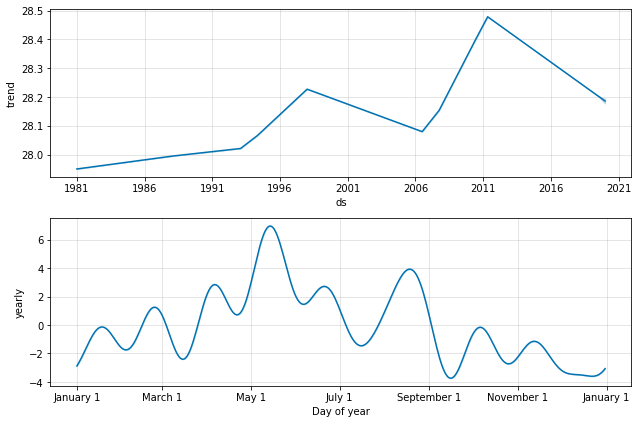

In [224]:
fig2 = model.plot_components(forecast)

In [225]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (360, 1)
9.582768467313363


C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mid_temp,Month,yhat
0,27.20,1,26.739317
1,25.40,1,26.739317
2,24.95,1,26.739317
3,26.15,1,26.739317
4,25.55,1,26.739317
...,...,...,...
355,27.30,12,25.051480
356,26.60,12,25.051480
357,26.10,12,25.051480
358,24.75,12,25.051480


In [226]:
import matplotlib.pyplot as plt

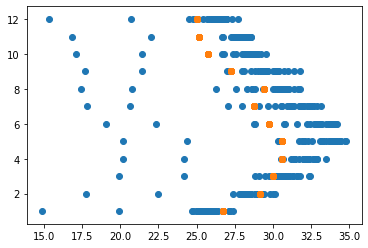

In [227]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()